 Model Evaluation:
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): ₹0.25
R² Score: 0.72


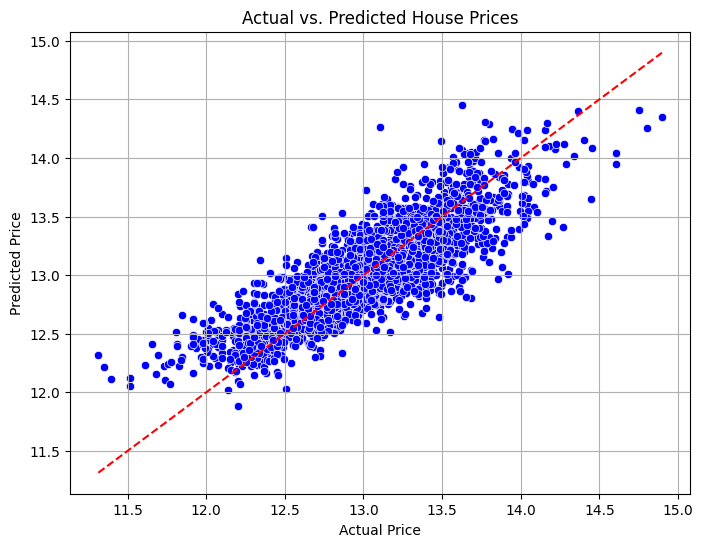

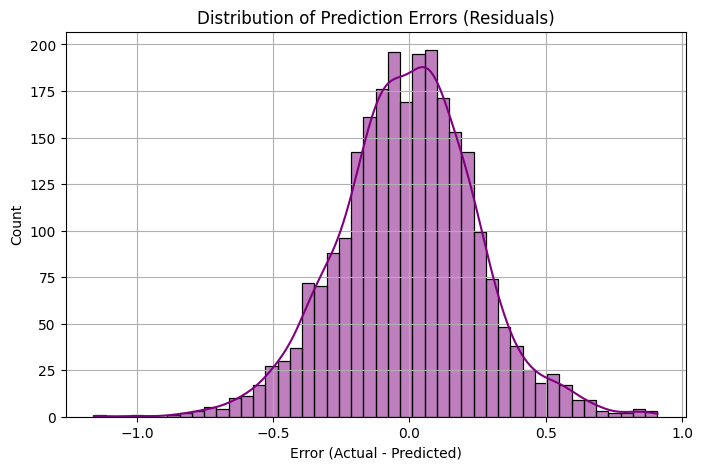

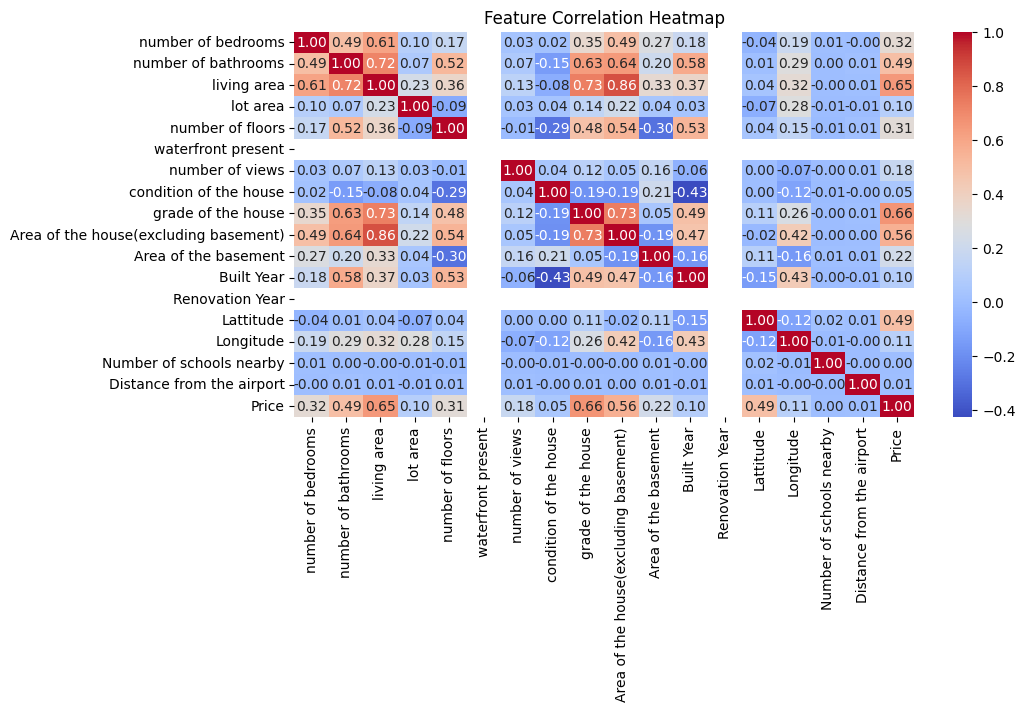

 Model, scaler, PCA, and input columns saved successfully.


In [1]:
#  SECTION 1: Train the model and save preprocessing steps (with log-transformed price)
# !pip install matplotlib
# !pip install joblib
# !pip install scikit-learn
# !pip install seaborn



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


#  Load PCA-preprocessed dataset
df = pd.read_csv("/home/shubh-k-pc/Documents/AIML/house-price-prediction-model-main/data/house_price_india_cleaned .csv")

#  Separate features and target
X = df.drop("Price", axis=1)
y = np.log(df["Price"])  #  Log-transform the target variable

#  Save feature names
feature_names = X.columns.tolist()

#  Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

#  Save scaler and PCA
joblib.dump(scaler, "/home/shubh-k-pc/Documents/AIML/house-price-prediction-model-main/models/scaler.pkl")
joblib.dump(pca, "/home/shubh-k-pc/Documents/AIML/house-price-prediction-model-main/models/pca.pkl")

#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#  Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#  Evaluate model (convert back from log to original price scale)
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)
mse = mean_squared_error(np.exp(y_test), y_pred)
r2 = r2_score(np.exp(y_test), y_pred)
rmse = np.sqrt(mse)

print(" Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
print(f"R² Score: {r2:.2f}")

#  Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.exp(y_test), y=y_pred, color="blue")
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()

#  Residual distribution
residuals = np.exp(y_test) - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.grid(True)
plt.show()

#  Correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



# Run prediction function

import os

# Create directory if it doesn't exist
os.makedirs("/home/shubh-k-pc/Documents/AIML/house-price-prediction-model-main/models", exist_ok=True)

# Save the trained linear regression model
with open("/home/shubh-k-pc/Documents/AIML/house-price-prediction-model-main/models/house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the feature names (input columns)
with open("/home/shubh-k-pc/Documents/AIML/house-price-prediction-model-main/models/input_columns.pkl", "wb") as f:
    pickle.dump(feature_names, f)

# Save scaler and PCA (you already have this part, but confirm paths)
joblib.dump(scaler, "/home/shubh-k-pc/Documents/AIML/house-price-prediction-model-main/models/scaler.pkl")
joblib.dump(pca, "/home/shubh-k-pc/Documents/AIML/house-price-prediction-model-main/models/pca.pkl")

print(" Model, scaler, PCA, and input columns saved successfully.")

